In [1]:
# Install Ultralytics YOLOv8
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 28.9 MB/s eta 0:00:00


In [2]:
# Import dependencies
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files
import os

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
# Load YOLOv8 model (small version for faster inference)
model = YOLO("yolov8s.pt")  # Small model for faster detection

In [4]:
print("Please upload an image for object detection...")
uploaded = files.upload()  # This will open a file chooser in Colab

Please upload an image for object detection...


Saving sample.jpg to sample.jpg



image 1/1 /content/sample.jpg: 352x640 1 bird, 1 elephant, 1 zebra, 2 giraffes, 45.6ms
Speed: 7.5ms preprocess, 45.6ms inference, 266.7ms postprocess per image at shape (1, 3, 352, 640)
Object Detection Results:


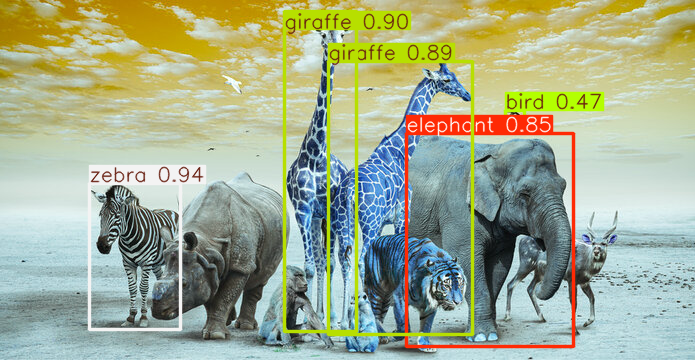


Detection Details:
- zebra: 0.94
- giraffe: 0.90
- giraffe: 0.89
- elephant: 0.85
- bird: 0.47

✅ Detection completed! Saved as detected_image.jpg


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
# Check if any file was uploaded
if not uploaded:
    print("No file uploaded. Using a sample image instead.")
    # You could add code here to download a sample image if needed
else:
    # Get the uploaded file name
    image_path = list(uploaded.keys())[0]

    # Run YOLO detection
    results = model(image_path)

    # Get annotated image with bounding boxes
    annotated_img = results[0].plot()  # Draw bounding boxes on the image

    # Convert BGR to RGB for proper display (OpenCV uses BGR, matplotlib uses RGB)
    annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    # Show the annotated image
    print("Object Detection Results:")
    cv2_imshow(annotated_img_rgb)

    # Display detection details
    print("\nDetection Details:")
    for result in results:
        boxes = result.boxes
        for box in boxes:
            class_id = int(box.cls[0])
            class_name = result.names[class_id]
            confidence = float(box.conf[0])
            print(f"- {class_name}: {confidence:.2f}")

    # Save the output image
    output_path = "detected_image.jpg"
    cv2.imwrite(output_path, annotated_img)
    print(f"\n✅ Detection completed! Saved as {output_path}")

    files.download(output_path)